# Lab 4
- Use 1R on the housing dataset.


- Use J48 (or other algorithm) with 2 different parameter settings to create 2 decision trees for the weather dataset. Compute the average information for the leaf nodes.


- Compute the information for the root node. How much information is gained from each tree? Summarize your results.


- Regression: Using the equation
$$y = \frac{1}{2} x^2 + x + 2 + p_{G}(x)$$ or 
$$y = \frac{1}{2} x^2 + x + 2 + GaussNoise(N[0, 1])$$ 
where $p_{G}(x)$ is the probability density function $p$ of a Gaussian (normally distributed) random variable $z$ such that 
$$p_{G}(x) = f(x|\mu, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$ 
with 
   - $\mu$ as the mean (as well as its median and mode) of the distribution
   - $\sigma$ is the standard deviation
   - $\sigma^2$ is the variance
 
 Then generate a synthetic data set with x values from -3 to +3 and fit a quadratic model and plot the solution and the data points.




<BarContainer object of 21 artists>

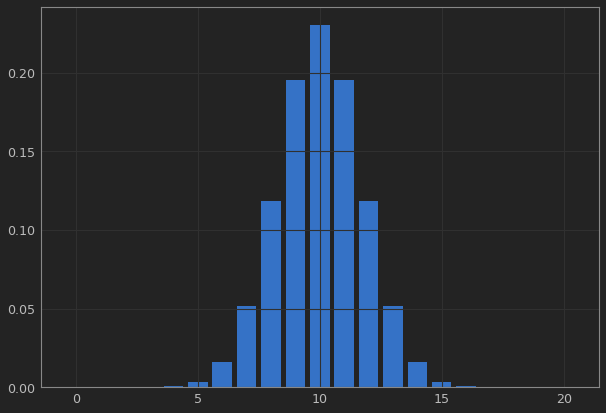

In [33]:
# Essential imports
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline

# import jtplot submodule from jupyterthemes to style our plots
from jupyterthemes import jtplot
jtplot.style()

# Import learning tools
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


# probability density function of a gaussian random variable
# note that this is a normal distrubution, so (mean = median = mode)
p_g = lambda x, mean, variance : 1/np.sqrt(2*np.pi*variance)*np.exp(-((x-mean)**2)/(2*variance))


# plot the normal distribution bar graph
data = [p_g(i, 10, 3) for i in range(21)]
fig = plt.figure(figsize = (10, 7))
plt.bar(list(range(21)), data)

Metrics of polynomial regression:
  RMSE:  0.9536902883851812
  R2:  0.6532723386227666
-------------------------------------
Metrics of ideal equation:
  RMSE:  0.9795007687969013
  R2:  0.6342508441385084


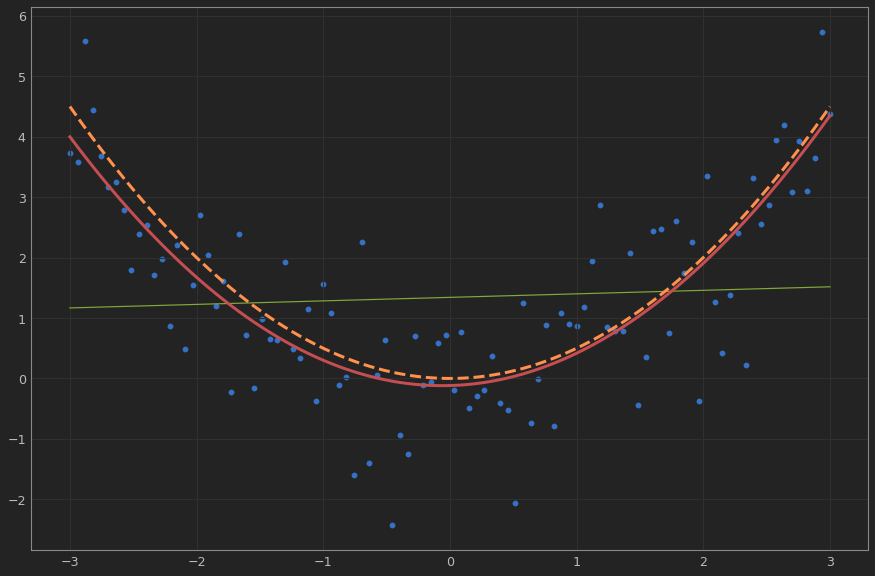

In [57]:
# hand code a quadratic function using the Gaussian Probability function
# so we can compare to our regression/interpolation
quadratic_model = lambda x : (0.5)*x**2 + p_g(x, 10, 2)

# function that generates a set of points that are a random, constrained distance
# from our ideal quadratic curve
data_gen = lambda x : (0.5)*x**2 + np.random.normal(0,1)

# generate our input points in the x-dimension
x = np.linspace(-3,3,100)

# generate our synthetic dataset (aka the y-values of scatterplot points)
data___ = [data_gen(i) for i in x]

# prepare synthetic dataset graph for regression
#x = np.linspace(-3,3,100)
x = x[:, np.newaxis]

y = np.asarray(data___)
y = y[:, np.newaxis]

# linear fit
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# polynomial regression fit
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# ideal polynomial fit
y_ideal = quadratic_model(x)

# calculate regression metrics
print("Metrics of polynomial regression:")
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("  RMSE: ", rmse)
print("  R2: ", r2)
print("-------------------------------------")
# calculate ideal metrics
print("Metrics of ideal equation:")
rmse = np.sqrt(mean_squared_error(y,y_ideal))
r2 = r2_score(y,y_ideal)
print("  RMSE: ", rmse)
print("  R2: ", r2)

# plot it
plt.figure(figsize=(15,10))

    # raw synthetic dataset
plt.scatter(x, y)
    # linear fit
plt.plot(x, y_pred, color='g')
    # polynomial fit
plt.plot(x, y_poly_pred, linewidth=3, color='r')
    # hand-coded quadratic function
plt.plot(x, y_ideal, '--', linewidth=3, color='y')